In [5]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# SVM libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [6]:
# Read data set
data = pd.read_excel('Raisin_Dataset.xlsx', sheet_name = 'Raisin_Dataset')
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [7]:
# Data frame structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [8]:
# Convert columns to numeric
data['Class'] = data['Class'].str.replace('Kecimen', '0')
data['Class'] = data['Class'].str.replace('Besni', '1')

cols = data.columns
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

In [9]:
# Data frame structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [10]:
# Classes are distrubuted evenly
data['Class'].value_counts()

0    450
1    450
Name: Class, dtype: int64

In [11]:
# Data for SVM
X = data
X = X.drop(['Class'], axis = 1)
Y = data.Class # class

In [122]:
# Parameters for classificator - rbf kernel
gamma = [0.0005, 0.005, 0.01, 0.05, 0.2, 0.8, 1.5, 2.5, 5, 10, 20, 50, 100]
gamma = np.array(gamma)
C = [1, 10, 100, 1000, 10000, 100000]
C = np.array(C)

# Tables to save accuracy - rbf kernel
Accuracy_CV = np.zeros((10,1))
Accuracy = np.zeros((len(gamma), len(C)))

Accuracy_CV_rbf = np.zeros((10,1))
Accuracy_rbf = np.zeros((len(gamma), len(C)))

In [123]:
# SVM - rbf kernel
for i in range(0, len(C)): # C
    for j in range(0, len(gamma)): # gamma
        for k in range(1, 10): # Crossvalidation
            # Split data into test and train sets
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10) # 10 times cs so test_size is 10% of data set 
            
            # Standarization
            sc = StandardScaler()
            sc.fit(X_train)
            X_train = sc.transform(X_train)
            X_test = sc.transform(X_test)
            X_train = pd.DataFrame(X_train)
            X_test = pd.DataFrame(X_test)
            
            # Model
            svclassifier = SVC(kernel = 'rbf', C = C[i], gamma = gamma[j])
            
            svclassifier.fit(X_train, Y_train)
            y_pred = svclassifier.predict(X_test)
            
            # Accuracy - how many values from y_pred are equal to Y_test
            Accuracy_CV[k] = sum(y_pred == Y_test)/len(Y_test)

        Accuracy[j,i] = np.mean(Accuracy_CV) # rows - gamma, columns - C
        
#Accuracy # display accuracy table

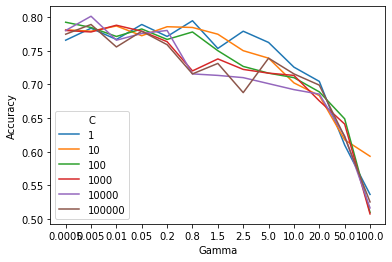

In [124]:
# rbf kernel accuracy plot
# axis X - gamma, different lines - C     
for p in range(0, len(C)): # number of lines = number of C values 
    plt.plot(Accuracy[:,p], label = C[p]) # every line plotted separately in order to have a name
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.xticks(np.arange(len(gamma)), gamma) # correct axis X ticks
plt.legend(title = 'C')

In [128]:
# SVM - rbf kernel - testing on test
for i in range(0, len(C)): # C
    for j in range(0, len(gamma)): # gamma
        for k in range(1, 10): # Crossvalidation
            # Split data into test and train sets
            X_train_rbf, X_test_rbf, Y_train_rbf, Y_test_rbf = train_test_split(X_train, Y_train, test_size = 0.10) # 10 times cs so test_size is 10% of data set 
            
            # Standarization
            sc = StandardScaler()
            sc.fit(X_train_rbf)
            X_train_rbf = sc.transform(X_train_rbf)
            X_test_rbf = sc.transform(X_test_rbf)
            X_train_rbf = pd.DataFrame(X_train_rbf)
            X_test_rbf = pd.DataFrame(X_test_rbf)
            
            # Model
            svclassifier = SVC(kernel = 'rbf', C = C[i], gamma = gamma[j])
            
            svclassifier.fit(X_train_rbf, Y_train_rbf)
            y_pred_rbf = svclassifier.predict(X_test)
            
            # Accuracy - how many values from y_pred are equal to Y_test
            Accuracy_CV_rbf[k] = sum(y_pred_rbf == Y_test)/len(Y_test)

        Accuracy_rbf[j,i] = np.mean(Accuracy_CV_rbf) # rows - gamma, columns - C
        
#Accuracy # display accuracy table

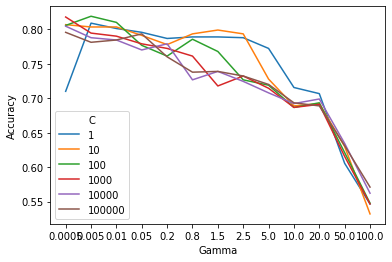

In [129]:
# rbf kernel accuracy plot
# axis X - gamma, different lines - C     
for p in range(0, len(C)): # number of lines = number of C values 
    plt.plot(Accuracy_rbf[:,p], label = C[p]) # every line plotted separately in order to have a name
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.xticks(np.arange(len(gamma)), gamma) # correct axis X ticks
plt.legend(title = 'C')

In [147]:
X_train_rbf_o, X_test_rbf_o, Y_train_rbf_o, Y_test_rbf_o = train_test_split(X, Y, test_size = 0.10)
            
# Standarization
sc_rbf_o = StandardScaler()
sc_rbf_o.fit(X_train_rbf_o)
X_train_rbf_o = sc.transform(X_train_rbf_o)
X_test_rbf_o = sc.transform(X_test_rbf_o)
X_train_rbf_o = pd.DataFrame(X_train_rbf_o)
X_test_rbf_o = pd.DataFrame(X_test_rbf_o)
            
# Model
svclassifier = SVC(kernel = 'rbf', C = 10, gamma = 1.5)
            
svclassifier.fit(X_train_rbf_o, Y_train_rbf_o)
y_pred_rbf_o = svclassifier.predict(X_test_rbf_o)
            
# Accuracy - how many values from y_pred are equal to Y_test
Accuracy_CV_rbf_o = sum(y_pred_rbf_o == Y_test_rbf_o)/len(Y_test_rbf_o)
Accuracy_CV_rbf_o

C:\Users\hired\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\hired\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


0.4666666666666667

In [20]:
# Parameters for classificator - polynomial kernel
degree = [1,2,3,4,5,6,7,8,9]
degree = np.array(degree)

# Tables to save accuracy - polynomial kernel
Accuracy_CV_poly = np.zeros((10,1))
Accuracy_poly = np.zeros(len(degree))

In [21]:
# SVM - polynomial kernel
for i in range(0, len(degree)): # degree
    for k in range(1, 10): # Crossvalidation
        # Split data into test and train sets
        X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X, Y, test_size = 0.10) # 10 times cs so test_size is 10% of data set 
            
        # Standarization
        sc = StandardScaler()
        sc.fit(X_train_poly)
        X_train_poly = sc.transform(X_train_poly)
        X_test_poly = sc.transform(X_test_poly)
        X_train_poly = pd.DataFrame(X_train_poly)
        X_test_poly = pd.DataFrame(X_test_poly)
            
        # Model
        svclassifier = SVC(kernel='poly', degree = degree[i])
        svclassifier.fit(X_train_poly, Y_train_poly)
        
        y_pred_poly = svclassifier.predict(X_test_poly)
            
        # Accuracy - how many values from y_pred are equal to Y_test
        Accuracy_CV_poly[k] = sum(y_pred_poly == Y_test_poly)/len(Y_test_poly)

    Accuracy_poly[i] = np.mean(Accuracy_CV_poly) # rows - gamma, columns - C
    
#Accuracy_poly # display accuracy table

array([0.77444444, 0.59222222, 0.76555556, 0.57666667, 0.67666667,
       0.59222222, 0.63333333, 0.56222222, 0.57666667])

Text(0, 0.5, 'Accuracy')

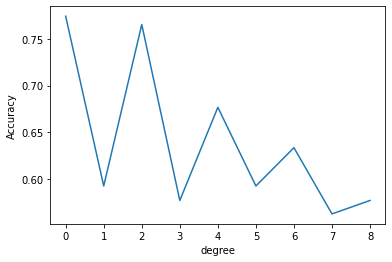

In [22]:
# polynomial kernel accuracy plot
# axis X - degree
plt.plot(Accuracy_poly)
plt.xlabel('degree')
plt.ylabel('Accuracy')
#plt.xticks(np.arange(len(degree)), degree) # correct axis X ticks